In [93]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from constants import *

from sklearn import datasets
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans,AffinityPropagation

import warnings
from constants import *
import math
import seaborn as sns
import random
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import dill

In [94]:
df = pd.read_csv('/Users/akankshitadash/Desktop/Programs/MA4199/Task 1/MachineLearning/Code/AdjustedRPKMoutput/RNASeq_chrE.txt',sep='\t')

In [95]:
df.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4
0,NM_017847,ODR4,50.0,6.605436,62.0,5.568612,71.0,5.308751,30.0,2.859319,51.0,3.102104
1,NM_001143986,TLE6,4.0,0.419612,6.0,0.427921,3.0,0.178120,3.0,0.227049,3.0,0.144899
2,NM_001003803,ATP5S,29.0,8.070253,52.0,9.838214,52.0,8.190209,19.0,3.814631,22.0,2.818815
3,NM_001003800,BICD2,778.0,54.632204,1155.0,55.141030,1444.0,57.390343,706.0,35.767093,883.0,28.548580
4,NM_016649,ESF1,17.0,1.199367,26.0,1.247097,10.0,0.399306,9.0,0.458095,20.0,0.649663


In [96]:
df.keys()

Index(['AccNum', 'GeneName', 'cdReads0', 'cdRPKM0', 'cdReads1', 'cdRPKM1',
       'cdReads2', 'cdRPKM2', 'cdReads3', 'cdRPKM3', 'cdReads4', 'cdRPKM4'],
      dtype='object')

In [97]:
df.shape

(12429, 12)

In [98]:
path =  '/Users/akankshitadash/Desktop/Bayesian Networks/RNASeq_chrE/6/AccNums/'
clusters = [[],[],[],[],[],[]]
indices = []
num = ['6']
for i in num: #cluster number
    for j in range(int(i)): #sub-cluster within clusters
        path_load=path+'AccNum'+str(j+1)+'.txt'
        print(path_load)
        f = open(path_load, "r")
        idx=0
        for x in f:
            if(not df.loc[df['AccNum'] == x[:-1]].empty):
                idx+=1
                list_new = np.log2(df.loc[df['AccNum'] == x[:-1]][['cdRPKM0','cdRPKM1', 'cdRPKM2', 'cdRPKM3','cdRPKM4']].values[0])
                clusters[int(j)-int(i)].append(list_new)
        indices.append(len(clusters[int(j)-int(i)]))
        print(len(clusters[int(j)-int(i)]),idx)     
        
        

/Users/akankshitadash/Desktop/Bayesian Networks/RNASeq_chrE/6/AccNums/AccNum1.txt
1182 1182
/Users/akankshitadash/Desktop/Bayesian Networks/RNASeq_chrE/6/AccNums/AccNum2.txt
1058 1058
/Users/akankshitadash/Desktop/Bayesian Networks/RNASeq_chrE/6/AccNums/AccNum3.txt
2159 2159
/Users/akankshitadash/Desktop/Bayesian Networks/RNASeq_chrE/6/AccNums/AccNum4.txt
2475 2475
/Users/akankshitadash/Desktop/Bayesian Networks/RNASeq_chrE/6/AccNums/AccNum5.txt
1322 1322
/Users/akankshitadash/Desktop/Bayesian Networks/RNASeq_chrE/6/AccNums/AccNum6.txt
2145 2145


In [99]:
print(indices)

[1182, 1058, 2159, 2475, 1322, 2145]


In [100]:
for i in range(1,6):
    indices[i]+=indices[i-1]

In [101]:
print(indices)

[1182, 2240, 4399, 6874, 8196, 10341]


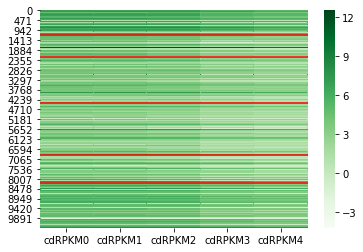

In [102]:
stacked = []
for cluster in clusters:
    for row in cluster:
        stacked.append(row)

ax = sns.heatmap(stacked,xticklabels=['cdRPKM0','cdRPKM1', 'cdRPKM2', 'cdRPKM3','cdRPKM4'],cmap="Greens")
ax.hlines(indices, *ax.get_xlim(),color='r')
plt.savefig('/Users/akankshitadash/Desktop/Bayesian Networks/RNASeq_chrE/Heatmap6.png')
plt.show()

In [103]:
# def plot_heatmap(X,idx,indices,path):
#     ax = sns.heatmap(X,xticklabels=['TE0','TE1', 'TE2', 'TE3','TE4'])
#     plt.title('Heatmap'+str(idx))
#     ax.hlines(indices, *ax.get_xlim())
#     plt.savefig(path)
#     plt.show()
    
# for idx,cluster in enumerate(clusters):
#     path = '/Users/akankshitadash/Desktop/Bayesian Networks/TE_chrE/4/'+str(idx+4)
#     plot_heatmap(cluster,idx+4,indices[idx],path)